<h2 align = center> PROYECTO INTEGRADOR </h2>

INCLUIR UNA INTRODUCCION

#### Importamos las librerías a utilizar

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import Tools as t
from datetime import datetime
from summarytools import dfSummary
import Tools as t

#### Se extraen los datos a dataframes de pandas

In [40]:
df_homicidios = pd.read_excel('homicidios.xlsx', sheet_name='HECHOS')
df_homicidios.head()


,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [41]:
df_victimas = pd.read_excel('homicidios.xlsx', sheet_name='VICTIMAS')
df_victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


Normalizamos los nombres de las columnas de ambos dataframes, para hacer más sencillo el manejo de los datos

In [42]:
df_homicidios.columns = ['idSiniestro','NumVictimas','Fecha','Anio','Mes','Dia','Hora','H','LugarHecho','TipoDeCalle','Calle','Altura','Cruce','DireccionNormalizada','Comuna','XYplana','PosX','PosY','Participantes','Victima','Acusado']
df_homicidios.head()

,idSiniestro,NumVictimas,Fecha,Anio,Mes,Dia,Hora,H,LugarHecho,TipoDeCalle,...,Altura,Cruce,DireccionNormalizada,Comuna,XYplana,PosX,PosY,Participantes,Victima,Acusado
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [43]:
df_victimas.columns = ['idSiniestro','Fecha','Anio','Mes','Dia','Rol','Victima','Sexo','Edad','FechaFallecimiento']
df_victimas.head()

,idSiniestro,Fecha,Anio,Mes,Dia,Rol,Victima,Sexo,Edad,FechaFallecimiento
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


#### Comenzamos revisando el dataframe homicidios

In [44]:
df_homicidios.describe()

,NumVictimas,Fecha,Anio,Mes,Dia,Altura,Comuna
count,696.000000,696,696.000000,696.000000,696.000000,129.000000,696.000000
mean,1.030172,2018-09-14 05:12:24.827586048,2018.188218,6.692529,15.936782,3336.635659,7.425287
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,30.000000,0.000000
25%,1.000000,2017-04-02 12:00:00,2017.000000,4.000000,9.000000,1359.000000,4.000000
50%,1.000000,2018-07-12 12:00:00,2018.000000,7.000000,16.000000,2551.000000,8.000000
75%,1.000000,2020-01-04 06:00:00,2020.000000,10.000000,23.000000,4500.000000,11.000000
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,16080.000000,15.000000
std,0.179393,NaN,1.683754,3.571309,8.639646,3060.641793,4.387050


En promedio hay más accidentes con fallecimiento:
* A las 5 am
* En el año 2018 se tuvieron en promedio tiene más muertes por accidentes viales
* El mes de Junio en promedio tiene más muertes por accidentes viales
* Los días 15 en promedio tienen más muertes por accidentes viales
* En la comuna 7 en promedio tiene más muertes por accidentes viales

Se revisa el tipo de datos que hay en cada columna

In [45]:
df_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   idSiniestro           696 non-null    object        
 1   NumVictimas           696 non-null    int64         
 2   Fecha                 696 non-null    datetime64[ns]
 3   Anio                  696 non-null    int64         
 4   Mes                   696 non-null    int64         
 5   Dia                   696 non-null    int64         
 6   Hora                  696 non-null    object        
 7   H                     696 non-null    object        
 8   LugarHecho            696 non-null    object        
 9   TipoDeCalle           696 non-null    object        
 10  Calle                 695 non-null    object        
 11  Altura                129 non-null    float64       
 12  Cruce                 525 non-null    object        
 13  DireccionNormalizada

Se procede a buscar valores nulos

In [46]:
nulos = t.PorcentajeNulos(df_homicidios)
nulos

,%_valores_nulos,Cantidad_Nulos,Cantidad_NO_Nulos,Total_Registros
idSiniestro,0.00,0,696,696
NumVictimas,0.00,0,696,696
Fecha,0.00,0,696,696
Anio,0.00,0,696,696
Mes,0.00,0,696,696
Dia,0.00,0,696,696
Hora,0.00,0,696,696
H,0.00,0,696,696
LugarHecho,0.00,0,696,696
TipoDeCalle,0.00,0,696,696


Aparentemente únicamente se observa un ~81% de nulos en la columna altura, por lo que procederemos a inputar los datos tomando información de la columna Comuna. 

In [48]:
df_homicidios.columns

Index(['idSiniestro', 'NumVictimas', 'Fecha', 'Anio', 'Mes', 'Dia', 'Hora',
       'H', 'LugarHecho', 'TipoDeCalle', 'Calle', 'Altura', 'Cruce',
       'DireccionNormalizada', 'Comuna', 'XYplana', 'PosX', 'PosY',
       'Participantes', 'Victima', 'Acusado'],
      dtype='object')

Se busca en las demás columnas valores sin datos (registros que no están vacios pero no son Nulos)

Columna idSiniestros, no se observa problemas

In [49]:
df_homicidios['idSiniestro'].value_counts()

idSiniestro
2016-0001    1
2019-0050    1
2019-0042    1
2019-0043    1
2019-0044    1
            ..
2017-0111    1
2017-0112    1
2017-0113    1
2017-0114    1
2021-0097    1
Name: count, Length: 696, dtype: int64

Columna Numero de victimas, no se observa problemas

In [50]:
df_homicidios['NumVictimas'].value_counts()

NumVictimas
1    676
2     19
3      1
Name: count, dtype: int64

Columna de años, no se observa problemas

In [53]:
df_homicidios['Anio'].value_counts()

Anio
2016    144
2018    143
2017    131
2019    103
2021     97
2020     78
Name: count, dtype: int64

Columna mes, no se observa problemas

In [55]:
df_homicidios['Mes'].value_counts()

Mes
12    78
11    67
8     65
1     62
5     60
6     58
2     56
3     51
7     51
10    51
4     50
9     47
Name: count, dtype: int64

Columna día, no se observa problemas

In [56]:
df_homicidios['Dia'].value_counts()

Dia
20    31
17    30
3     27
11    27
27    27
12    26
14    26
28    25
10    25
9     25
15    25
23    24
25    24
4     23
7     23
18    23
22    23
19    23
2     22
29    22
26    21
24    20
21    20
6     19
16    18
13    18
5     18
1     18
30    16
8     14
31    13
Name: count, dtype: int64

Columna Hora, no se observa problemas

In [57]:
df_homicidios['Hora'].value_counts()

Hora
16:00:00    10
14:00:00    10
21:00:00     9
08:00:00     9
09:00:00     9
            ..
16:40:00     1
10:12:00     1
09:40:00     1
22:30:00     1
00:43:00     1
Name: count, Length: 375, dtype: int64

Columna H, no se observa problemas

<Axes: xlabel='H', ylabel='count'>

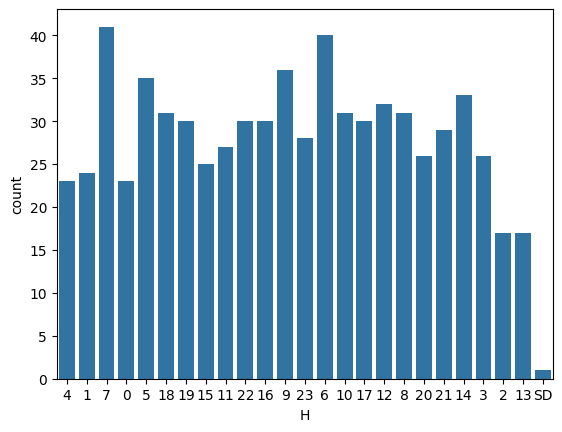

In [59]:
df_homicidios['H'].value_counts()
sns.countplot(data = df_homicidios, x = 'H')

In [60]:
df_homicidios['LugarHecho'].value_counts()

LugarHecho
AV 27 DE FEBRERO Y AV ESCALADA              4
CASTILLO, RAMON S., PRES. AV. Y CALLE 12    2
PAZ, GRAL. AV. Y DEL LIBERTADOR AV.         2
AV LA PLATA Y CNEL GREGORIO POMAR           2
CANTILO, INT. Y UDAONDO, GUILLERMO AV.      2
                                           ..
AV. ALVEAR Y AV. DEL LIBERTADOR             1
AV. PAVON Y TREINTA Y TRES ORIENTALES       1
COLECTORA AV. GRAL. PAZ 5750                1
VIEYTES Y CRUZ                              1
PADRE CARLOS MUJICA 709                     1
Name: count, Length: 683, dtype: int64

In [61]:
df_homicidios['TipoDeCalle'].value_counts()

TipoDeCalle
AVENIDA      429
CALLE        136
AUTOPISTA     66
GRAL PAZ      65
Name: count, dtype: int64

In [62]:
df_homicidios['Calle'].value_counts()

Calle
PAZ, GRAL. AV.                                57
RIVADAVIA AV.                                 19
DEL LIBERTADOR AV.                            18
AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI    14
ALBERDI, JUAN BAUTISTA AV.                    13
                                              ..
PILCOMAYO                                      1
CERVANTES                                      1
CONGRESO AV.                                   1
AUSTRALIA AV.                                  1
PADRE CARLOS MUJICA                            1
Name: count, Length: 279, dtype: int64

In [63]:
df_homicidios['Altura'].value_counts()

Altura
901.0     2
4300.0    2
365.0     2
1893.0    1
466.0     1
         ..
5750.0    1
2135.0    1
5400.0    1
2114.0    1
709.0     1
Name: count, Length: 126, dtype: int64

In [65]:
df_homicidios['Cruce'].value_counts()

Cruce
PAZ, GRAL. AV.              14
ESCALADA AV.                 9
RIVADAVIA AV.                8
INDEPENDENCIA AV.            7
BALBIN, RICARDO, DR. AV.     6
                            ..
LA RIOJA                     1
TRAFUL                       1
HUMAITA                      1
MANZANARES                   1
HUGO, VICTOR                 1
Name: count, Length: 317, dtype: int64

Columna comuna, no se observa problemas

In [66]:
df_homicidios['Comuna'].value_counts()

Comuna
1     90
4     76
9     73
8     65
7     60
3     45
15    44
13    40
12    37
14    35
11    32
10    29
2     25
5     22
6     21
0      2
Name: count, dtype: int64

Columna XY geolocalización plana

In [68]:
df_homicidios['PosX'].value_counts()

PosX
.               12
-58.44451316     5
-58.50073810     4
-58.46743471     4
-58.50877521     4
                ..
-58.39100580     1
-58.37697717     1
-58.45807401     1
-58.42023854     1
-58.37976155     1
Name: count, Length: 605, dtype: int64

In [69]:
df_homicidios['PosY'].value_counts()

PosY
.               12
-34.68475866     5
-34.54979510     4
-34.53476874     4
-34.66977709     4
                ..
-34.58498660     1
-34.59573848     1
-34.63997430     1
-34.64234110     1
-34.58679619     1
Name: count, Length: 605, dtype: int64

Se observan 12 puntos sin información, por lo que  buscaremos complementarlos con los puntos de geolocalización plana para rellenar los datos faltantes

In [67]:
df_homicidios['XYplana'].value_counts()

XYplana
Point (. .)                                14
Point (101721.59002217 93844.25656649)      5
Point (96563.66494817 108815.73881056)      4
Point (99620.34936816 110483.29286598)      4
Point (95832.05571093 95505.41641999)       4
                                           ..
Point (106632.70892338 104910.17381357)     1
Point (107918.77617420 103716.42961253)     1
Point (100479.14412395 98812.52258620)      1
Point (103948.02389064 98549.15451723)      1
Point (107664.16647795 104708.63962087)     1
Name: count, Length: 606, dtype: int64

Eliminamos la palabra Point

In [76]:
df_homicidios['XYplana'] = df_homicidios['XYplana'].str.replace('Point ', '')

Se eliminan los registros vacios

In [78]:
df_homicidios = df_homicidios[df_homicidios['XYplana'] != '( . .)']
df_homicidios['XYplana']

0        (98896.78238426 93532.43437792)
1        (95832.05571093 95505.41641999)
2       (106684.29090040 99706.57687843)
3        (99840.65224780 94269.16534422)
4      (106980.32827929 100752.16915795)
                     ...                
691     (102728.60090138 98186.24929177)
692      (99624.29795829 97569.69801131)
693     (99116.45492358 101045.23284826)
694      (99324.54463985 97676.26932409)
695    (107664.16647795 104708.63962087)
Name: XYplana, Length: 696, dtype: object

Se separa la columna en Xplana y Yplana

In [84]:
df_homicidios[['Xplana', 'Yplana']] = df_homicidios['XYplana'].str.extract(r'\(([\d\.]+)\s([\d\.]+)\)')                  # Separamos las columnas en X y Y

df_homicidios.drop('XYplana', axis=1, inplace=True)                                                                      # Eliminamos la columna original

df_homicidios['Xplana']

0       98896.78238426
1       95832.05571093
2      106684.29090040
3       99840.65224780
4      106980.32827929
            ...       
691    102728.60090138
692     99624.29795829
693     99116.45492358
694     99324.54463985
695    107664.16647795
Name: Xplana, Length: 696, dtype: object

In [ ]:
if df_homicidios['']

In [ ]:
df_homicidios['Yplana']

In [70]:
df_homicidios['Participantes'].value_counts()

Participantes
PEATON-PASAJEROS       105
MOTO-AUTO               83
MOTO-CARGAS             78
PEATON-AUTO             77
MOTO-PASAJEROS          46
MOTO-OBJETO FIJO        40
PEATON-CARGAS           38
AUTO-AUTO               31
PEATON-MOTO             30
MOTO-MOTO               25
AUTO-OBJETO FIJO        22
MULTIPLE                17
AUTO-CARGAS             14
BICICLETA-CARGAS        10
AUTO-PASAJEROS           9
MOTO-SD                  9
BICICLETA-PASAJEROS      8
BICICLETA-AUTO           8
SD-SD                    5
PEATON-BICICLETA         5
AUTO-SD                  4
CARGAS-CARGAS            4
PEATON-SD                4
PASAJEROS-PASAJEROS      3
MOTO-OTRO                2
MOTO-BICICLETA           2
SD-AUTO                  2
MOTO-MOVIL               2
CARGAS-OBJETO FIJO       1
CARGAS-AUTO              1
MOVIL-PASAJEROS          1
SD-CARGAS                1
SD-MOTO                  1
MOVIL-CARGAS             1
PASAJEROS-AUTO           1
AUTO-MOVIL               1
CARGAS-PASAJER

In [71]:
df_homicidios['Victima'].value_counts()

Victima
MOTO           295
PEATON         264
AUTO            83
BICICLETA       29
SD               9
CARGAS           7
PASAJEROS        5
MOVIL            2
OBJETO FIJO      1
PEATON_MOTO      1
Name: count, dtype: int64

In [72]:
df_homicidios['Acusado'].value_counts()

Acusado
AUTO           204
PASAJEROS      173
CARGAS         146
OBJETO FIJO     62
MOTO            57
SD              23
MULTIPLE        17
BICICLETA        7
OTRO             6
TREN             1
Name: count, dtype: int64

Modificamos el tipo de dato de cada columna

In [ ]:
def conv_datetime(x):
    try:
        return datetime.strptime(str(x), '%H:%M:%S').time()
    except ValueError:
        try:
            return datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S').time()
        except ValueError:
            return pd.NaT  # En caso de que no se pueda convertir, se asigna un valor nulo

df_homicidios['Hora'] = df_homicidios['Hora'].apply(conv_datetime)

In [ ]:
print(df_homicidios['Hora'].dtype)

object


No se modifico el tipo de dato, hay que averiguar porque, por lo que buscamos que datos no se pudieron cambiar

In [ ]:
mascara = df_homicidios['Hora'].apply(lambda x: isinstance(x, datetime))            # Buscamos los valores que sean diferentes a datetime
df_homicidios[mascara]

,idSiniestro,NumVictimas,Fecha,Anio,Mes,Dia,Hora,H,LugarHecho,TipoDeCalle,...,Altura,Cruce,DireccionNormalizada,Comuna,XYplana,PosX,PosY,Participantes,Victima,Acusado
518,2019-0103,1,2019-12-18,2019,12,18,NaT,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,...,NaN,GRIVEO,"PAZ, GRAL. AV. y GRIVEO",11,(94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


Hay un registro con Not A Time, por lo que se reemplazará por la hora promedio que se calculó anteriormente

In [ ]:
df_homicidios.loc[518,'Hora'] = '05:12:24'
df_homicidios.loc[518,'Hora']

'05:12:24'

Se revisa el contenido de las demás columnas, buscando repetidos o typos

In [ ]:
df_homicidios['Victima'].value_counts()

Victima
MOTO           295
PEATON         264
AUTO            83
BICICLETA       29
SD               9
CARGAS           7
PASAJEROS        5
MOVIL            2
OBJETO FIJO      1
PEATON_MOTO      1
Name: count, dtype: int64

In [ ]:
df_homicidios['Acusado'].value_counts()

Acusado
AUTO           204
PASAJEROS      173
CARGAS         146
OBJETO FIJO     62
MOTO            57
SD              23
MULTIPLE        17
BICICLETA        7
OTRO             6
TREN             1
Name: count, dtype: int64

In [ ]:
df_homicidios['TipoDeCalle'].value_counts()

TipoDeCalle
AVENIDA      429
CALLE        136
AUTOPISTA     66
GRAL PAZ      65
Name: count, dtype: int64

In [ ]:
df_homicidios['Calle'].value_counts()

Calle
PAZ, GRAL. AV.                                57
RIVADAVIA AV.                                 19
DEL LIBERTADOR AV.                            18
AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI    14
ALBERDI, JUAN BAUTISTA AV.                    13
AUTOPISTA PERITO MORENO                       12
AUTOPISTA 25 DE MAYO                          11
CORRIENTES AV.                                11
SAN MARTIN AV.                                10
CORDOBA AV.                                   10
PERON, EVA AV.                                 9
JUSTO, JUAN B. AV.                             9
AUTOPISTA DELLEPIANE LUIS TTE. GRAL.           8
FERNANDEZ DE LA CRUZ, F., GRAL. AV.            8
27 DE FEBRERO AV.                              8
LA PLATA AV.                                   8
DIRECTORIO AV.                                 8
INDEPENDENCIA AV.                              7
CABILDO AV.                                    7
ALCORTA, AMANCIO AV.                           7
SANTA FE AV.  

In [ ]:
df_homicidios['DireccionNormalizada'].value_counts()

DireccionNormalizada
nan                                                                            8
27 DE FEBRERO AV. y ESCALADA AV.                                               5
PAZ, GRAL. AV. y DEL LIBERTADOR AV.                                            4
PAZ, GRAL. AV. y BALBIN, RICARDO, DR. AV.                                      4
DEL LIBERTADOR AV. y RAMOS MEJIA, JOSE MARIA, DR. AV.                          3
INDEPENDENCIA AV. y CEVALLOS, VIRREY                                           3
CASTILLO, RAMON S., PRES. AV. y CALLE 12 (NO OFICIAL)                          3
ALCORTA, AMANCIO AV. y BONAVENA, OSCAR NATALIO                                 3
PAZ, GRAL. AV. y DE LOS CORRALES AV.                                           3
AUTOPISTA PERITO MORENO y BARRAGAN                                             2
AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI y CASEROS AV.                       2
AUTOPISTA 25 DE MAYO y AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI              2
CORRIEN

Hay 8 datos sin información

In [ ]:
df_homicidios['Anio'].value_counts()

Anio
2016    144
2018    143
2017    131
2019    103
2021     97
2020     78
Name: count, dtype: int64

In [ ]:
df_homicidios['NumVictimas'].value_counts()

NumVictimas
1    676
2     19
3      1
Name: count, dtype: int64

In [ ]:
df_homicidios['Participantes'].value_counts()

Participantes
PEATON-PASAJEROS       105
MOTO-AUTO               83
MOTO-CARGAS             78
PEATON-AUTO             77
MOTO-PASAJEROS          46
MOTO-OBJETO FIJO        40
PEATON-CARGAS           38
AUTO-AUTO               31
PEATON-MOTO             30
MOTO-MOTO               25
AUTO-OBJETO FIJO        22
MULTIPLE                17
AUTO-CARGAS             14
BICICLETA-CARGAS        10
AUTO-PASAJEROS           9
MOTO-SD                  9
BICICLETA-PASAJEROS      8
BICICLETA-AUTO           8
SD-SD                    5
PEATON-BICICLETA         5
AUTO-SD                  4
CARGAS-CARGAS            4
PEATON-SD                4
PASAJEROS-PASAJEROS      3
MOTO-OTRO                2
MOTO-BICICLETA           2
SD-AUTO                  2
MOTO-MOVIL               2
CARGAS-OBJETO FIJO       1
CARGAS-AUTO              1
MOVIL-PASAJEROS          1
SD-CARGAS                1
SD-MOTO                  1
MOVIL-CARGAS             1
PASAJEROS-AUTO           1
AUTO-MOVIL               1
CARGAS-PASAJER

In [ ]:
df_homicidios['idSiniestro'].value_counts()                 # Validar si hay id repetidos (que no debería)

idSiniestro
2016-0001    1
2019-0050    1
2019-0042    1
2019-0043    1
2019-0044    1
2019-0045    1
2019-0046    1
2019-0047    1
2019-0048    1
2019-0049    1
2019-0051    1
2019-0040    1
2019-0053    1
2019-0054    1
2019-0055    1
2019-0056    1
2019-0057    1
2019-0058    1
2019-0059    1
2019-0060    1
2019-0041    1
2019-0039    1
2019-0062    1
2019-0028    1
2019-0020    1
2019-0021    1
2019-0022    1
2019-0023    1
2019-0024    1
2019-0025    1
2019-0026    1
2019-0027    1
2019-0029    1
2019-0038    1
2019-0030    1
2019-0031    1
2019-0032    1
2019-0033    1
2019-0034    1
2019-0035    1
2019-0036    1
2019-0037    1
2019-0061    1
2019-0063    1
2016-0002    1
2019-0095    1
2019-0087    1
2019-0088    1
2019-0089    1
2019-0090    1
2019-0091    1
2019-0092    1
2019-0093    1
2019-0094    1
2019-0096    1
2019-0085    1
2019-0097    1
2019-0098    1
2019-0100    1
2019-0101    1
2019-0102    1
2019-0103    1
2019-0104    1
2019-0105    1
2019-0086    1
2019-0084    

Se realiza un resumen descriptivo después de los cambios realizados

In [ ]:
dfSummary(df_homicidios)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,idSiniestro[object],1. 2016-00012. 2019-00503. 2019-00424. 2019-00435. 2019-00446. 2019-00457. 2019-00468. 2019-00479. 2019-004810. 2019-004911. other,1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)686 (98.6%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADXElEQVR4nO3cwWkbYRRG0TdGOPZGQhhcQtKDi0ixKUJFpAdjPIvY8WaySBYpINwB5ZwK/sWFh2A+Ldu2DRRu9n4A/w+xkREbGbGRERsZsZERGxmxkREbGbGRuVmW5cuyLHd7P4TrdzMzn2fm094P4fo5o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRG5mZmvs/Mz70fwvVb/IsRFWeUjNjIWFeRsa4i44ySERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZExeCFj8ELGGSUjNjIGL2QMXsg4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHFGyYiNjNjIWFeRsa4i44ySERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZGxriJjXUXGGSUjNjIGL2QMXsg4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHFGyYiNjMELGYMXMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZGxriJjXUXGGSUjNjLWVWSsq8g4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHFGyYiNjMELGYMXMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9knFEyYiMjNjLWVWSsq8g4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZKyryFhXkXFGyYiNjMELGYMXMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9knFEyy8zcz8zt3g/hqn1s2/Z2eHh4+Ho8Hs97v4brta7ry7Is3w7H4/H89PT0djqd3vd+FNfn9fX17nK5nJ+fn28PMzOn0+n98fHxx94P42rdz/iBQEhsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERuYw8/szkL0fwnX6u63Duq4vl8vlPH8+A4F/bV3Xl5n58Fk4hY9t296sq8j4gUBGbGTERkZsZMRGRmxkxEZGbGTERuYXwgdpOf758ysAAAAASUVORK5CYII="">",0(0.0%)
2,NumVictimas[int64],Mean (sd) : 1.0 (0.2)min < med < max:1.0 < 1.0 < 3.0IQR (CV) : 0.0 (5.7),3 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABs0lEQVR4nO3XQWrCUBCH8ZkiqQ/khZCaY3gAD+FhPYRbTxLkZdGoVF53hVJaTbToX77fNplhFh8RPedswKN7ufcBwCUm515w92Bmxcj9x5xzP3IW+PJnqO4e6rpexRirMcu7rtu5+5pYca1zX9Qixlgtl8u+LMv9kMUppelms6nati3MjFBxlbM//WZmZVnum6Z5H7E/jJgBfuDPFCQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiRM7n3AM3L3YGbFyPFjzrm/5T3PgFBvzN1DXderGGM1Zr7rup27r4n1u4tCTSlNhy5OKU1Pp9PEzKK7Dz5MWJzNZvPFYvERQjgMGez7/nW73c7btn1z9+6/DnxQh5zz/reHnwblSFGwSZ17AAAAAElFTkSuQmCC"">",0(0.0%)
3,Fecha[datetime64[ns]],"Min: 2016-01-01Max: 2021-12-30Duration: 2,190 days",598 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABNCAYAAACxBha+AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACj0lEQVR4nO3dTYriQBiH8bfGVqJCRATdeYGBWbj0EHPYOcIsPIE3cCeIREx3MMbMZmAWPX6k2vzNx/Pbl2TxkHpjCuLyPDdA4durLwDtQWyQeSvjR51zfTPreSw95Xn+8ezrQTU8PTbnXH8ymfwMw3BcdO3hcNg7534RXDOVcWfrhWE4Xi6XH6PRKHl0URRFwWq1Gu92u56ZEVsDlbKNmpmNRqNkOp2+F1zWL+ViUAmlxVYHX5gtzZgvC2ttbF+ZLc2YL320NjbznC3NmC99tTk2M/OeLc2YLwvjT13INOLO5jnoh5fLpVvG9eD/ah+b76CfpmmQZdn3JEl+m5nPNoqCah+beQ76m81mvF6vB+fzuVPmxeGfJsRmZsUH/f1+z4AvVqnYsizrmlnonCuyjNnrhiodirgZm3LwjuO4m6bpj/l83ul0Og9vh8xe11XtUMTV2NSD9+l0eguCYLBYLJLZbLZ/dB2z102VOhRx6872ksF7OBwyez1ZVQ5F3J3ZGLzxLLxBgAyxQYbYIENskCE2yFTqDUKdeL7tMGvxcXJi8+D7tsOs3cfJic2D79uOth8nJ7YvKPq246/W/unNAwJkuLOJtfnBgtiE2v5gQWxCbX+wILYXqMODRRnbPbHhk7K2e2LDJ2Vt98SGq5693fM/G2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yHAuviSZ8I4LYaqAp34ggthpoyjciiK1G6v6NCB4QIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUHm7uHJKIqCIj94PB4DM7M4joPtdjto2ro6Xat63b1W/gB+uLzYNGXziQAAAABJRU5ErkJggg=="">",0(0.0%)
4,Anio[int64],Mean (sd) : 2018.2 (1.7)min < med < max:2016.0 < 2018.0 < 2021.0IQR (CV) : 3.0 (1198.6),6 distinct values,"<img src = ""data:ima

#### Ahora pasamos a revisar el dataframe de Victimas

In [ ]:
df_victimas.describe()

,Fecha,Anio,Mes,Dia,Sexo
count,717,717.000000,717.000000,717.000000,711.000000
mean,2018-09-09 01:36:24.100418304,2018.174338,6.688982,15.960948,0.766526
min,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,0.000000
25%,2017-04-01 00:00:00,2017.000000,4.000000,9.000000,1.000000
50%,2018-07-07 00:00:00,2018.000000,7.000000,16.000000,1.000000
75%,2019-12-18 00:00:00,2019.000000,10.000000,23.000000,1.000000
max,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,1.000000
std,NaN,1.672655,3.575140,8.683358,0.423339


In [ ]:
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   idSiniestro         717 non-null    object        
 1   Fecha               717 non-null    datetime64[ns]
 2   Anio                717 non-null    int64         
 3   Mes                 717 non-null    int64         
 4   Dia                 717 non-null    int64         
 5   Rol                 717 non-null    object        
 6   Victima             717 non-null    object        
 7   Sexo                717 non-null    object        
 8   Edad                717 non-null    object        
 9   FechaFallecimiento  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


Se observa el tipo de dato de cada columna, también que hay 716 registros y hay 10 columnas. Hay columnas que no corresponde el tipo de dato con la información que debería contener, por lo que se irá una a una revisando su contenido y modificando el tipo de dato

In [ ]:
df_victimas['idSiniestro'].value_counts()

idSiniestro
2017-0035    3
2017-0050    2
2016-0041    2
2018-0015    2
2020-0063    2
            ..
2017-0115    1
2017-0116    1
2017-0118    1
2017-0120    1
2021-0096    1
Name: count, Length: 696, dtype: int64

In [ ]:
df_victimas['Victima'].value_counts()

Victima
MOTO         303
PEATON       267
AUTO          94
BICICLETA     29
SD             9
CARGAS         7
PASAJEROS      5
MOVIL          3
Name: count, dtype: int64

In [ ]:
df_victimas['Rol'].value_counts()

Rol
CONDUCTOR               330
PEATON                  267
PASAJERO_ACOMPAÑANTE     80
CICLISTA                 29
SD                       11
Name: count, dtype: int64

In [ ]:
df_victimas['Sexo'].value_counts()

Sexo
MASCULINO    545
FEMENINO     166
SD             6
Name: count, dtype: int64

Se reemplazan los valores Masculino por 1 y Femenino por 0

In [ ]:
df_victimas['Sexo'] = df_victimas['Sexo'].map({'MASCULINO': 1, 'FEMENINO': 0})

In [ ]:
df_victimas['Sexo'].value_counts()

Sexo
1.0    545
0.0    166
Name: count, dtype: int64

Al modificar su contenido, se modificó e tipo de dato al que era esperado

In [ ]:
(df_victimas['Sexo'].dtype)

dtype('float64')

Se revisa la columna victima y se observa que su contenido son strings por lo que también se modificará el tipo de variable

In [ ]:
df_victimas['Victima'].value_counts

<bound method IndexOpsMixin.value_counts of 0        MOTO
1        AUTO
2        MOTO
3        MOTO
4        MOTO
        ...  
712    PEATON
713      MOTO
714      MOTO
715      MOTO
716      AUTO
Name: Victima, Length: 717, dtype: object>

Al observar la columna Fecha Fallecimiento, se observa que hay 68 registros sin información

In [ ]:
df_victimas['FechaFallecimiento'].value_counts()

FechaFallecimiento
SD                     68
2017-02-26 00:00:00     3
2017-01-16 00:00:00     3
2020-12-25 00:00:00     3
2019-12-18 00:00:00     3
                       ..
2018-01-19 00:00:00     1
2018-01-18 00:00:00     1
2018-01-14 00:00:00     1
2018-01-12 00:00:00     1
2022-01-02 00:00:00     1
Name: count, Length: 563, dtype: int64

Ahora se procede a modificar el tipo de dato de las columnas que les hace falta

In [ ]:
df_victimas = df_homicidios.astype({'idSiniestro': 'str',
                                       'Rol': 'str',
                                       'Victima':'str',
                                       'FechaFallecimiento':'str'
                                       })

Revisamos si hay valores duplicados

In [ ]:
mascara = df_victimas['idSiniestro'].map(df_victimas['idSiniestro'].value_counts()) > 1
df_victimas[mascara]

,idSiniestro,Fecha,Anio,Mes,Dia,Rol,Victima,Sexo,Edad,FechaFallecimiento
29,2016-0041,2016-03-29,2016,3,29,CONDUCTOR,MOTO,MASCULINO,54,2016-03-29 00:00:00
30,2016-0041,2016-03-29,2016,3,29,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,SD,2016-03-30 00:00:00
98,2016-0126,2016-09-18,2016,9,18,CONDUCTOR,AUTO,MASCULINO,37,SD
99,2016-0126,2016-09-18,2016,9,18,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,60,SD
163,2017-0026,2017-02-26,2017,2,26,PASAJERO_ACOMPAÑANTE,AUTO,FEMENINO,23,2017-02-26 00:00:00
164,2017-0026,2017-02-26,2017,2,26,CONDUCTOR,AUTO,MASCULINO,19,2017-02-26 00:00:00
173,2017-0035,2017-03-23,2017,3,23,CONDUCTOR,AUTO,MASCULINO,28,2017-03-23 00:00:00
174,2017-0035,2017-03-23,2017,3,23,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,32,2017-03-23 00:00:00
175,2017-0035,2017-03-23,2017,3,23,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,30,2017-03-23 00:00:00
176,2017-0036,2017-03-29,2017,3,29,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,SD,2017-03-29 00:00:00


Revisamos la cantidad de nulos 

In [ ]:
nulos = t.PorcentajeNulos(df_victimas)
nulos

,%_valores_nulos,Cantidad_Nulos,Cantidad_NO_Nulos,Total_Registros
idSiniestro,0.0,0,717,717
Fecha,0.0,0,717,717
Anio,0.0,0,717,717
Mes,0.0,0,717,717
Dia,0.0,0,717,717
Rol,0.0,0,717,717
Victima,0.0,0,717,717
Sexo,0.0,0,717,717
Edad,0.0,0,717,717
FechaFallecimiento,0.0,0,717,717


No se observan nulos en el dataframe, sin embargo al observar los análisis previos que 

In [ ]:
SD = t.ContarRegistrosSD(df_victimas,'SD')
SD

AttributeError: module 'Tools' has no attribute 'ContarRegistrosSD'